In [1]:
import cv2
import os
import numpy as np
import EpipolarGeometry as epigeo
from matplotlib import pyplot as plt

In [2]:
def convert(points):
    return epigeo.convert_coordinate(points, (7296, 5472))

In [3]:
left_img = plt.imread(os.path.join(os.curdir, 'left_image.jpg'))
right_img = plt.imread(os.path.join(os.curdir, 'right_image.jpg'))

In [4]:
left_img.shape

(5472, 7296, 3)

In [5]:
def plt_corners(img, corners):
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 15
    color = (0, 0, 255)
    thickness = 10
    for i in range(len(corners)):
        img = cv2.rectangle(img, (corners[i][0] - 30, corners[i][1] - 30), 
                                   (corners[i][0] + 30, corners[i][1] + 30), color, thickness)
        img = cv2.putText(img, str(i+1), (corners[i][0], corners[i][1]), font,  
                   fontScale, (255, 0, 0), thickness * 2, cv2.LINE_AA) 
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()
    return img

In [6]:
left_points = [
    (283, 4644),
    (2359, 4287),
    (998, 3067),
    (1874, 3301),
    (4195, 3677),
    (5449, 3497),
    (3795, 4764),
    (4251, 4343)
]
right_points = [
    (1279, 4828),
    (3130, 4645),
    (2190, 3457),
    (2675, 3684),
    (5127, 4162),
    (6571, 4001),
    (4708, 5290),
    (5206, 4884)
]

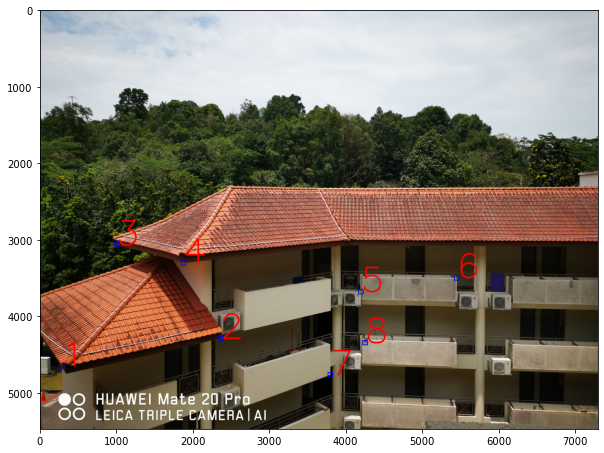

In [7]:
_ = plt_corners(left_img.copy(), left_points)

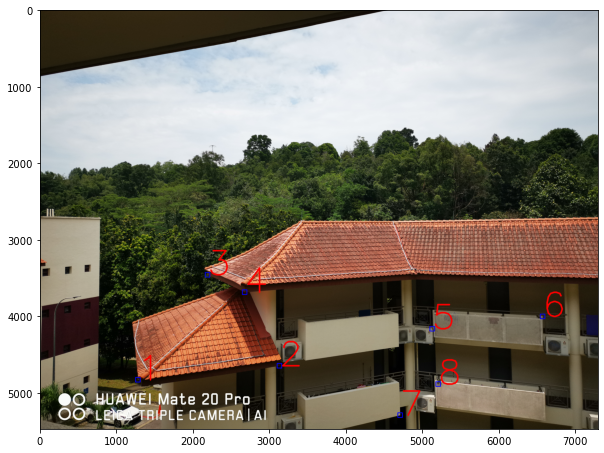

In [8]:
_ = plt_corners(right_img.copy(), right_points)

In [9]:
F = epigeo.get_FundamentalMatrix(convert(left_points), convert(right_points))

In [10]:
F

array([[ 3.57200986e-08,  1.72465971e-06,  1.22404573e-03],
       [-1.72300953e-06, -1.79635509e-07, -1.11192400e-03],
       [-5.05486374e-04,  1.96971770e-03,  1.00000000e+00]])

In [11]:
left_epi = [
        (2670, 3690),
        (3803, 3915),
        (3383, 3321)
]
# left_epi = [(tmp[1], tmp[0]) for tmp in left_epi]

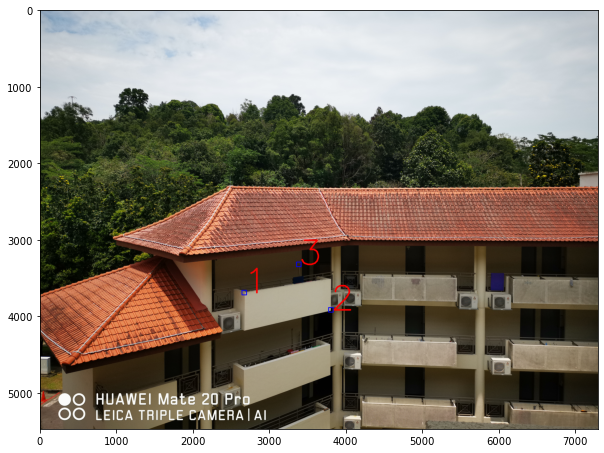

array([[[144, 166, 189],
        [141, 163, 186],
        [145, 167, 188],
        ...,
        [181, 188, 196],
        [181, 188, 196],
        [182, 189, 197]],

       [[141, 163, 186],
        [140, 162, 185],
        [142, 164, 187],
        ...,
        [181, 188, 196],
        [181, 188, 196],
        [181, 188, 196]],

       [[139, 161, 184],
        [141, 163, 186],
        [141, 163, 186],
        ...,
        [181, 188, 196],
        [180, 187, 195],
        [180, 187, 195]],

       ...,

       [[ 70,  62,  39],
        [ 84,  76,  53],
        [ 86,  78,  57],
        ...,
        [ 89,  77,  61],
        [ 88,  76,  60],
        [ 90,  78,  62]],

       [[ 59,  51,  32],
        [ 59,  51,  32],
        [ 57,  49,  30],
        ...,
        [ 91,  79,  63],
        [ 88,  76,  60],
        [ 91,  79,  63]],

       [[ 62,  53,  36],
        [ 61,  52,  35],
        [ 61,  54,  36],
        ...,
        [ 92,  80,  64],
        [ 89,  77,  61],
        [ 90,  78,  62]]

In [12]:
plt_corners(left_img.copy(), left_epi)

In [13]:
w,b = [], []
for coor in left_epi:
    tmp = epigeo.get_epipolar_param(F, convert([coor]), 'left')
    w.append(tmp[0])
    b.append(tmp[1])
w, b

([-2.4282494932726166, -0.6253918573529753, -0.3047457198670757],
 [-1900.7713786448396, -1021.1755241683957, -819.7109038379139])

(72.96, 54.72)


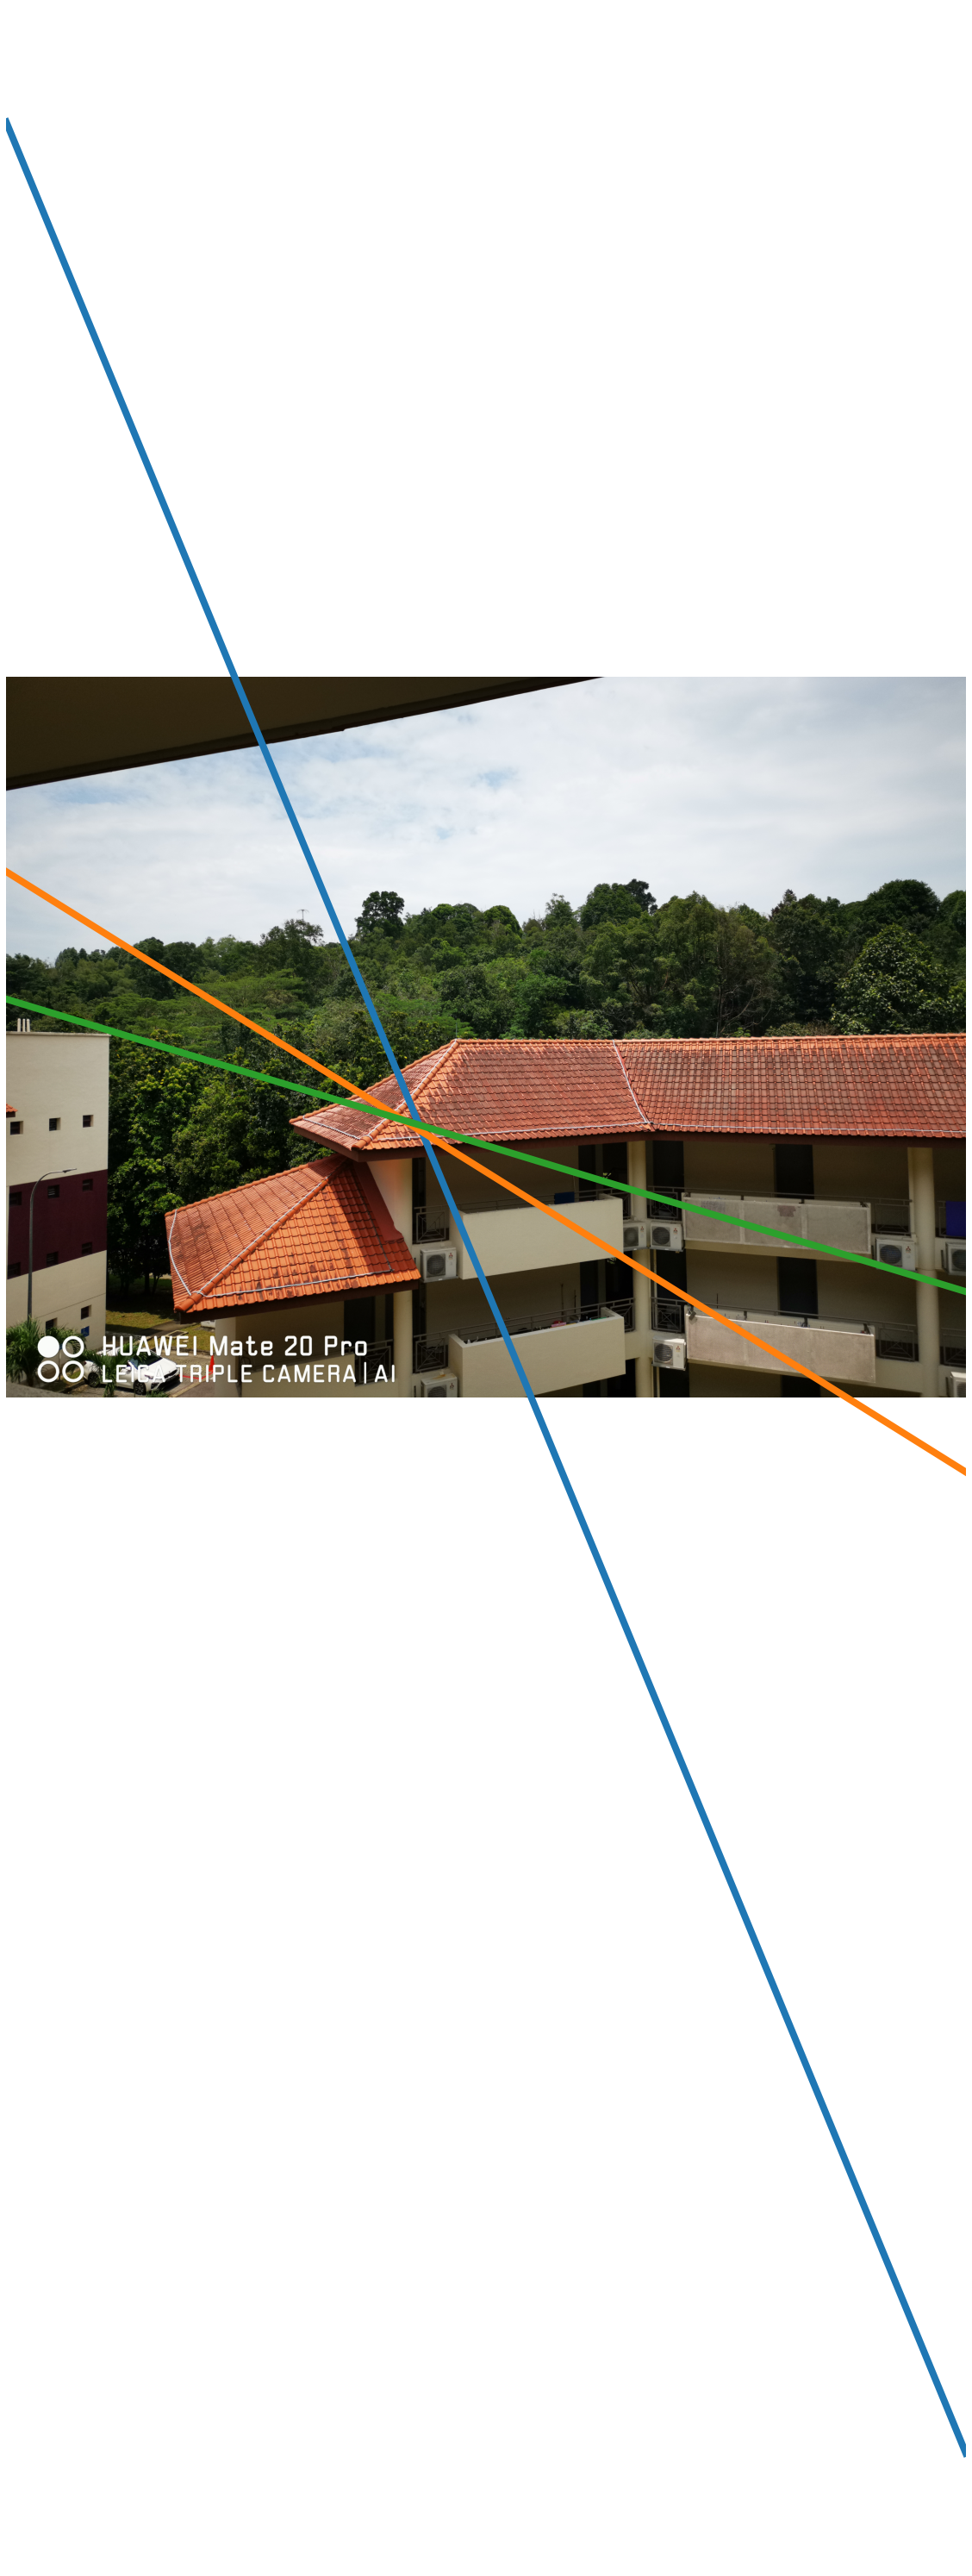

In [14]:
epigeo.plot_epipolar_line(w, b, 'right_image.jpg', 'right_img_epipolarline.jpg')

In [15]:
converted_left = convert(left_points)
converted_right = convert(right_points)

In [16]:
for i in range(8):
    print(np.matmul(np.matmul((converted_left[i][0], converted_left[i][1],1), F), 
                    np.asarray([converted_right[i][0], converted_right[i][1], 1]).T))

-4.440892098500626e-16
-2.220446049250313e-16
0.0
-5.551115123125783e-16
8.881784197001252e-16
-8.881784197001252e-16
0.0
4.440892098500626e-16


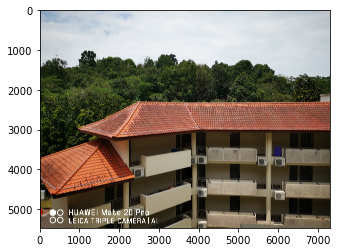

In [17]:
plt.figure(figsize=(6, 4))
plt.imshow(left_img)
plt.show()